<a href="https://colab.research.google.com/github/amdadev/amdadev/blob/main/tomato_leaf_diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amdadhossain","key":"77db8937c54f64c709f447ccdbc8d586"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                      title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                               Jobs and Salaries in Data Science     76KB  2023-12-25 20:03:32           7810        156  1.0              
vishakhdapat/customer-segmentation-clustering            Customer Segmentation : Clustering    62KB  2024-01-13 16:31:02            876         21  0.9411765        
mrsimple07/restaurants-revenue-prediction                Restaurants Revenue Prediction        42KB  2024-01-17 13:43:00            885         25  1.0              
nelgiriyewithana/new-york-housing-market                 New York Housing Market              271KB  2024-01-06 16:41:00           2595         75  1.0              
nelg

In [21]:
!kaggle kernels output ammarnassanalhajali/tomato-leaf-disease-detection-0-998-training -p /path/to/dest

Output file downloaded to /path/to/dest/InceptionV3_256.h5
Output file downloaded to /path/to/dest/naive_inception_module.png
Kernel log downloaded to /path/to/dest/tomato-leaf-disease-detection-0-998-training.log 


In [29]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tomato-leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Input
from keras.models import Sequential, Model
from keras.layers import Conv2D, GlobalMaxPool2D
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)

In [32]:
def get_label(number):
  labels = {
      0: 'Tomato___Bacterial_spot',
      1: "Tomato___Early_blight",
      2: "Tomato___Late_blight",
      3: "Tomato___Leaf_Mold",
      4: "Tomato___Tomato___Septoria_leaf_spot",
      5: "Tomato___Tomato___Spider_mites Two-spotted_spider_mite",
      6: "Tomato___Target_Spot",
      7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
      8: "Tomato___Tomato_mosaic_virus",
      9: "Tomato___healthy",
    }
  return labels[number]

In [33]:
label = 1
print(get_label(label))

Tomato___Early_blight


In [34]:
label = 7
print(get_label(label))

Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [35]:
label = 9
print(get_label(label))

Tomato___healthy


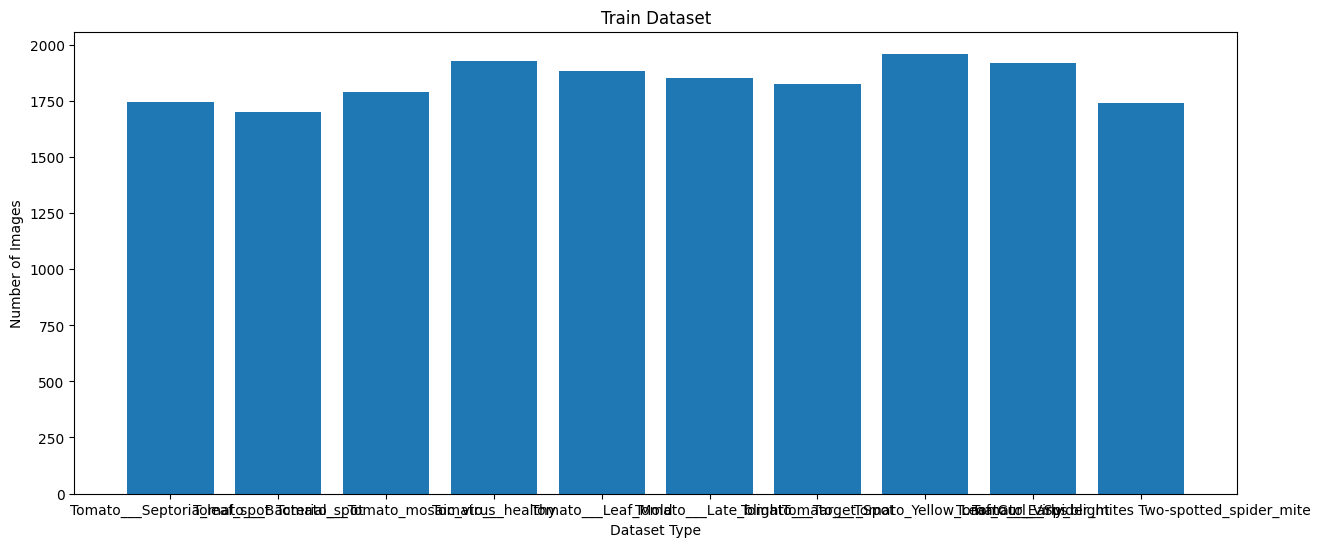

In [36]:
path1 = '/content/tomato_dataset/train'
subfolders1 = os.listdir(path1)
subfolder_counts1 = [len(os.listdir(os.path.join(path1, subfolder))) for subfolder in subfolders1]

plt.figure(figsize=(15, 6))
x_labels = subfolders1
x = range(len(x_labels))
y = subfolder_counts1
plt.bar(x, y)

plt.xticks(x, x_labels)
plt.xlabel('Dataset Type')
plt.ylabel('Number of Images')
plt.title('Train Dataset')

plt.show()

28


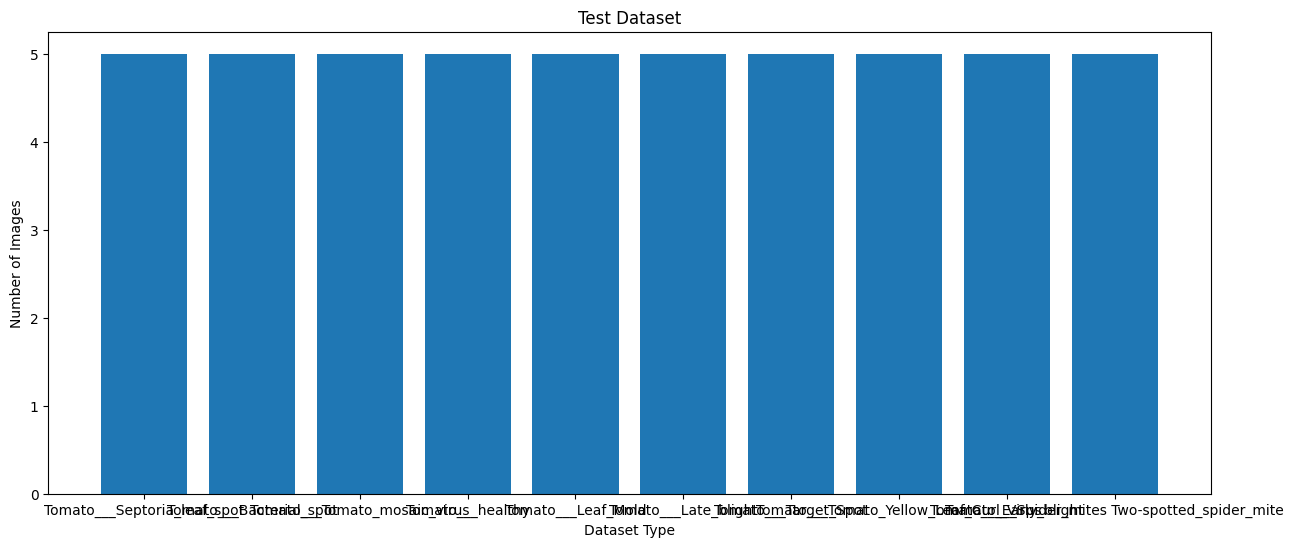

In [37]:
path2 = '/content/tomato_dataset/test'
print(len(path2))
subfolders2 = os.listdir(path2)
subfolder_counts2 = [len(os.listdir(os.path.join(path2, subfolder))) for subfolder in subfolders2]


plt.figure(figsize=(15, 6))
x_labels = subfolders2
x = range(len(x_labels))
y = subfolder_counts2
plt.bar(x, y)

plt.xticks(x, x_labels)
plt.xlabel('Dataset Type')
plt.ylabel('Number of Images')
plt.title('Test Dataset')
plt.show()

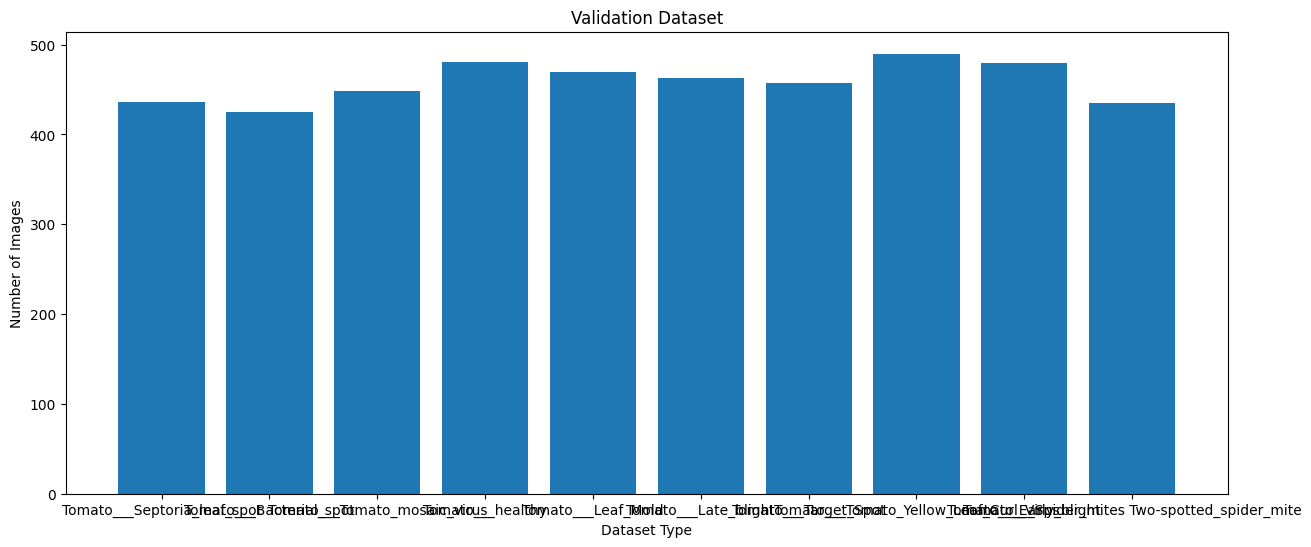

In [38]:
path3 = '/content/tomato_dataset/valid'

subfolders3 = os.listdir(path3)
subfolder_counts3 = [len(os.listdir(os.path.join(path3, subfolder))) for subfolder in subfolders3]

plt.figure(figsize=(15, 6))

x_labels = subfolders3
x = range(len(x_labels))
y = subfolder_counts3
plt.bar(x, y)
plt.xticks(x, x_labels)
plt.xlabel('Dataset Type')
plt.ylabel('Number of Images')
plt.title('Validation Dataset')
plt.show()

In [39]:
def load_images_from_directory(main_directory, foldername):
    images = []
    labels = []
    for label in os.listdir(os.path.join(main_directory, foldername)):
        folder_path = os.path.join(main_directory, foldername, label)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            try:
                img = cv2.imread(image_path)
                img = cv2.resize(img, (150, 150))
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    return images, labels

In [40]:
main_directory = "/content/tomato_dataset"
train_images, train_labels = load_images_from_directory(main_directory, "train")
test_images, test_labels = load_images_from_directory(main_directory, "test")
val_images, val_labels = load_images_from_directory(main_directory, "valid")

In [41]:
train_count = (len(train_images))
test_count = (len(test_images))
val_count = (len(val_images))

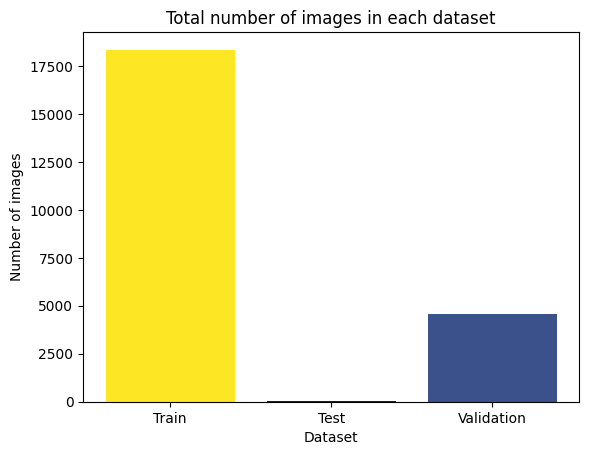

In [42]:
import numpy as np
x_labels = ['Train', 'Test', 'Validation']
x = np.arange(len(x_labels))
y = [train_count, test_count, val_count]

cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(vmin=min(y), vmax=max(y))

colors = [cmap(normalize(value)) for value in y]
plt.bar(x, y, color=colors)
plt.xticks(x, x_labels)
plt.xlabel('Dataset')
plt.ylabel('Number of images')
plt.title('Total number of images in each dataset')
plt.show()

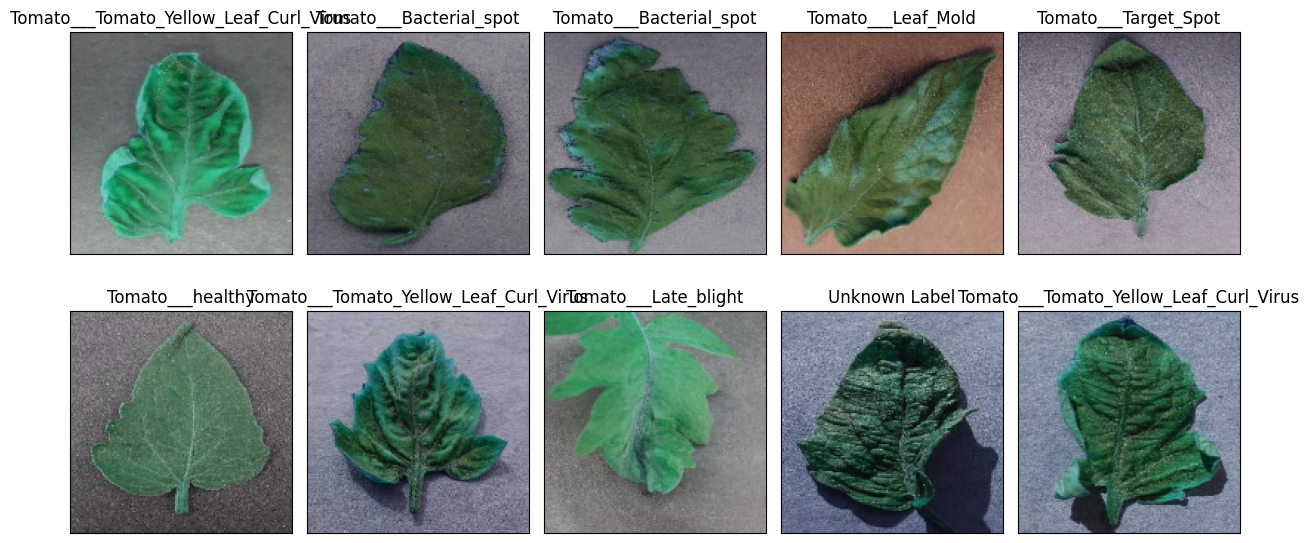

In [43]:
import random
import matplotlib.pyplot as plt

def get_label(label_string):
    valid_labels = [
        'Tomato___Bacterial_spot',
        "Tomato___Early_blight",
        "Tomato___Late_blight",
        "Tomato___Leaf_Mold",
        "Tomato___Tomato___Septoria_leaf_spot",
        "Tomato___Tomato___Spider_mites Two-spotted_spider_mite",
        "Tomato___Target_Spot",
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
        "Tomato___Tomato_mosaic_virus",
        "Tomato___healthy",
    ]

    if label_string in valid_labels:
        return label_string
    else:
        return "Unknown Label"

num_images = min(10, len(train_images))

# Randomly select num_images indices
random_indices = random.sample(range(len(train_images)), num_images)

# Visualize the random images and their labels
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    if i < num_images:
        ax.imshow(train_images[random_indices[i]])
        ax.set_title(get_label(train_labels[random_indices[i]]))
    else:
        ax.axis('off') # Hide the extra subplots

plt.tight_layout()
plt.show()

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
main_directory = "/content/tomato_dataset"
train_generator = train_datagen.flow_from_directory(
    os.path.join(main_directory, 'train'),
    target_size=(150, 150),
    batch_size=130,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    os.path.join(main_directory, 'test'),
    target_size=(150, 150),
    batch_size=130,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    os.path.join(main_directory, 'valid'),
    target_size=(150, 150),
    batch_size=130,
    class_mode='categorical')

Found 18345 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation= 'relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [51]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/10
142/142 [==============================] - 686s 5s/step - loss: 2.1669 - accuracy: 0.1872 - val_loss: 2.0314 - val_accuracy: 0.2471
Epoch 2/10
142/142 [==============================] - 692s 5s/step - loss: 1.8066 - accuracy: 0.3458 - val_loss: 1.7834 - val_accuracy: 0.3740
Epoch 3/10
142/142 [==============================] - 677s 5s/step - loss: 1.4581 - accuracy: 0.4845 - val_loss: 1.2214 - val_accuracy: 0.5411
Epoch 4/10
142/142 [==============================] - 674s 5s/step - loss: 1.1857 - accuracy: 0.5804 - val_loss: 1.6549 - val_accuracy: 0.4550
Epoch 5/10
142/142 [==============================] - 676s 5s/step - loss: 0.9852 - accuracy: 0.6548 - val_loss: 1.1964 - val_accuracy: 0.6323
Epoch 6/10
142/142 [==============================] - 675s 5s/step - loss: 0.8485 - accuracy: 0.7020 - val_loss: 0.7798 - val_accuracy: 0.7145
Epoch 7/10
142/142 [==============================] - 672s 5s/step - loss: 0.7090 - accuracy: 0.7497 - val_loss: 1.0722 - val_accuracy: 0.6613

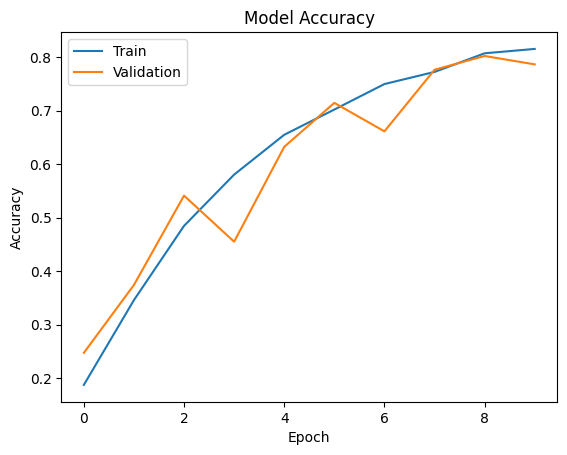

In [52]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # use 'val_acc' if that's the key in your history
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [53]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

1/1 [==============================] - 2s 2s/step - loss: 0.5274 - accuracy: 0.8400
Test Accuracy: 84.00%


1/1 [==============================] - 2s 2s/step


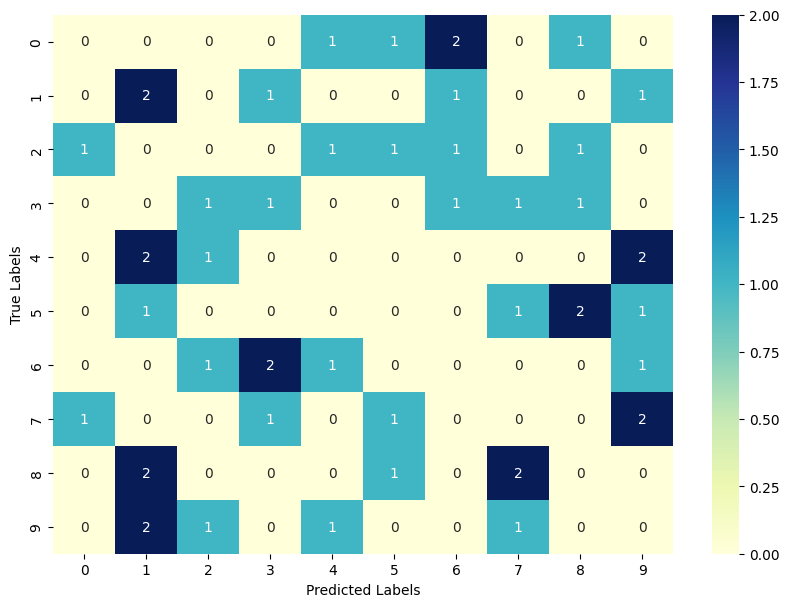

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get the true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [55]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.00      0.00      0.00         5
                        Tomato___Early_blight       0.22      0.40      0.29         5
                         Tomato___Late_blight       0.00      0.00      0.00         5
                           Tomato___Leaf_Mold       0.20      0.20      0.20         5
                  Tomato___Septoria_leaf_spot       0.00      0.00      0.00         5
Tomato___Spider_mites Two-spotted_spider_mite       0.00      0.00      0.00         5
                         Tomato___Target_Spot       0.00      0.00      0.00         5
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00         5
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00         5
                             Tomato___healthy       0.00      0.00      0.00         5

                                     accu

In [56]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.04
Recall: 0.06
F1-score: 0.05
